# Triangles and TV
---

TODO: Table of contents

<br>
<br>
<br>
<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

## Triangles
---

<br>
<br>
<br>


In [3]:
def getTriangleArea(corners, debug=False):
    r""" 
    Returns the area of the cartesian triangle with corners given
    
     Parameters: 
        corners - a numpy array of shape [3 verticies, 3 cartesians]
    """
    α1 = np.arccos(np.clip(np.dot(corners[0,:], corners[1,:]), -1.0, 1.0))
    α2 = np.arccos(np.clip(np.dot(corners[0,:], corners[2,:]), -1.0, 1.0))
    α3 = np.arccos(np.clip(np.dot(corners[2,:], corners[1,:]), -1.0, 1.0))

    
    A = -1    
    if(α1!=0):# and α1!=np.pi/2):
#         A = 0.5*np.linalg.norm(np.cross(corners[0,:],corners[1,:], axis=1))
        A = 0.5*np.linalg.norm(np.cross(corners[0,:],corners[1,:]))
        if(debug): print("A", A)
    elif(α2!=0):# and α2!=np.pi/2):
        A = 0.5*np.linalg.norm(np.cross(corners[0,:],corners[2,:]))
#         A = 0.5*np.linalg.norm(np.cross(corners[0,:],corners[2,:], axis=1))
        
        if(debug): print("A", A)
    elif(α3!=0 ):#and α3!=np.pi/2):
#         A = 0.5*np.linalg.norm(np.cross(corners[2,:],corners[1,:], axis=1))
        A = 0.5*np.linalg.norm(np.cross(corners[2,:],corners[1,:]))
        if(debug): print("A", A)
    
    return A
    
    

def cartesian_to_barycentric(triangle, point, wrap_gamma=False, debug=False):
    r"""
    Barycentric coordinates are defined for a point P as: {ϕ_1 v_1 + ϕ_2 v_2 + ϕ_3 v_3} for verticies v_1 to v_3 
    where ϕ_i = A_i/A
        A_1 being the area of the triangle with verticies P, v_2, v_3. 
        A is the total area of the triangle v_1, v_2, v_3
        
        
    Parameters: 
        triangles - a numpy array of shape (3 verticies, 3 cartesians)
        point - the point on the triangle
    
    Returns: 
        Signed Barycentric Coordinates (1,3)
    """
    
#     v1 = triangle[0,:].reshape((1,3))
#     v2 = triangle[1,:] .reshape((1,3))
#     v3 = triangle[2,:].reshape((1,3))
    v1 = triangle[0,:]
    v2 = triangle[1,:]
    v3 = triangle[2,:]
    if(debug):  print("v1:", v1)
    if(debug):  print("v2:", v2)
    if(debug):  print("v3:", v3)
        
    # the unit normal n
    n = np.cross((v2- v1), (v3 - v1))
    if(debug):  print("n",n)
    n_norm_sq = np.linalg.norm(n)**2
    if(debug):  print("|n|^2",n_norm_sq)
        
    n1 = np.cross((v3 - v2), (point - v2 ))
    phi_1 = np.dot(n,n1.T)/n_norm_sq
    
    n2 = np.cross((v1 - v3), (point - v3))
    phi_2 = phi_1 = np.dot(n,n2.T)/n_norm_sq
        
    if wrap_gamma:
        phi_3 = 1-phi_1-phi_2
    else:
        n3 = np.cross((v2 - v1), (point - v1))
        phi_3 = phi_1 = np.dot(n,n3.T)/n_norm_sq
    
    
    if(debug):  print("phi1:", phi_1)
    if(debug):  print("phi2:", phi_2)
    if(debug):  print("phi3:", phi_3)
        
    
#     return np.array((phi_1.item(), phi_2.item(), phi_3.item())).reshape(1,3)
    return np.array((phi_1, phi_2, phi_3)).T

# Need to make this vectorised

In [4]:
def barycentric_to_cartesian(bcs, corners = np.nan, debug=False):
    r"""
        Returns the cartesian coordinates of the barycentric points given the cartesian coordinates of the corners.
        
        
        Parameters:
            bcs - The barycentric coordinate sets [n, 3].
            corners - Cartesian coordinates of the corners of the triangle [3 corners, 3 coordinates]
    
    """
    
#     bcs_rect = np.hstack((bcs[:,:2], (1-bcs[:,0] - bcs[:,1]).reshape((bcs.shape[0],1))))
#     return  bcs_rect@corners

    cart =  bcs[:,0].reshape((-1,1))*corners[0].reshape((1,-1)) +\
            bcs[:,1].reshape((-1,1))*corners[1].reshape((1,-1)) +\
            bcs[:,2].reshape((-1,1))*corners[2].reshape((1,-1))
    return cart

In [5]:
tri = np.array([[2,2,1],
                [1,1,3],
                [1,0,0]])
# tri = np.array([[2,2,0],
#                 [1,0,0],
#                 [0,1,0]])


# pt = [0.5, 1, 0]
pt = np.sum(tri, axis=0)/3
print(pt)

tmp = cartesian_to_barycentric(tri, pt, wrap_gamma=False)#,debug=True)

print("BCs:", tmp)
print("Sum of BCs:", np.sum(tmp))


test = np.vstack((np.ones((1,3))*1/3,np.eye(3))) #testing with midpoint and all verticies
print("Test Barycentric Coords:]\ŋ",test)
x = barycentric_to_cartesian(test, tri, debug=True)
print("3D:\n",x)

[1.33333333 1.         1.33333333]
BCs: [0.33333333 0.33333333 0.33333333]
Sum of BCs: 1.0000000000000002
Test Barycentric Coords:]\ŋ [[0.33333333 0.33333333 0.33333333]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]]
3D:
 [[1.33333333 1.         1.33333333]
 [2.         2.         1.        ]
 [1.         1.         3.        ]
 [1.         0.         0.        ]]


# !!!Note!!!
---
There is an error when getting the cartesian coordinates for BC(1, 0, 0)

All others seem to work

In [6]:
test = np.vstack((np.ones((1,3))*1/3,np.eye(3))) #testing with midpoint and all verticies
print("Test Barycentric Coords:\n",test)

x = barycentric_to_cartesian(test, tri, debug=True)
print("3D:\n",x)

print("Back to Cartesian:")
print(cartesian_to_barycentric(tri, x, debug=False, wrap_gamma=False))

Test Barycentric Coords:
 [[0.33333333 0.33333333 0.33333333]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]]
3D:
 [[1.33333333 1.         1.33333333]
 [2.         2.         1.        ]
 [1.         1.         3.        ]
 [1.         0.         0.        ]]
Back to Cartesian:
[[0.33333333 0.33333333 0.33333333]
 [0.         0.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         1.        ]]


### Default example using barycentric coordinates to color triangles

<br>
<br>
<br>

In [7]:
n_pts = 1000 # initial random number of points
np.random.seed(seed=1)
bc_pts = np.random.randint(0,100,(n_pts,2))/100
bc_pts = np.hstack((bc_pts,(1 - bc_pts[:,0] - bc_pts[:,1]).reshape((n_pts,1))))
bc_pts = bc_pts[((bc_pts>=0).sum(axis=1)-2).astype(bool)] # Selecting points in the triangle

pts = barycentric_to_cartesian(bc_pts,corners=tri)


<IPython.core.display.Javascript object>


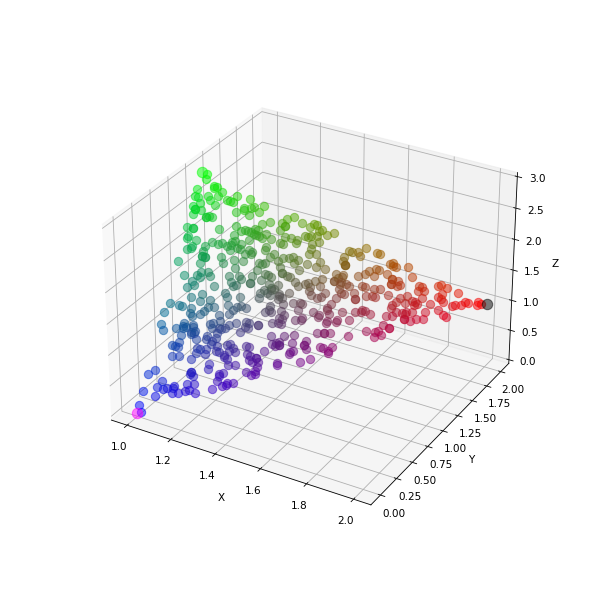

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

for p in range(pts.shape[0]):
    #     Plot each point with a colour defined by the points
    rgb = ([255,255,255]*bc_pts[p]).astype(tuple).astype(int)
    hex_c = '#{:02X}{:02X}{:02X}'.format(*rgb)
    ax.plot([pts[p,0]], [pts[p,1]], [pts[p,2]], 'o', c=hex_c, 
            markersize=8, alpha=0.5)  

for corner in tri:
    #     Plotting corner points
    pt = cartesian_to_barycentric(tri, corner)
    rgb = ([255,255,255]*pt).astype(tuple).astype(int)
    hex_c = '#{:02X}{:02X}{:02X}'.format(*rgb)
    ax.plot([corner[0]], [corner[1]], [corner[2]], 'o', c=hex_c,  
            markersize=10, alpha=0.5)     

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Total Variation in a triangular mesh
---

Total variation has been shown to be a powerful regulariser that is often used in image processing. 

Here it will be implemented on a mesh of points.

<br>
<br>
The equation for the total c
<br>

The equation for discrete total variation (DTV) is:
\begin{equation}
|u|_{DT V (Ω)} :=
\sum_T
\int_T
\mathcal{I}_T \{|∇u|_s\} dx +
\sum_E \int_E
\mathcal{I}_E\{|[[u]]_s\}dS
\end{equation}

where $[[u]]$ denotes the vector-valued jump of a function in normal direction across an interior
edge of the triangulation

In [9]:
import GenerateMesh

ModuleNotFoundError: No module named 'GenerateMesh'